# Automates finis - TP 1 

### Objectif du TP

L'objectif de ce premier TP est d'implémenter un programme avec deux [arguments](https://riptutorial.com/fr/python/example/6530/utilisation-d-arguments-en-ligne-de-commande-avec-argv): un fichier `.txt` contenant la description d'un automate fini _A_ et un mot _m_ à reconnaître. Votre programme doit (a) lire/charger l'automate _A_ à partir du fichier `.txt`, (b) afficher _ERROR_ si l'automate est non déterministe, ou (c) si, au contraire, l'automate est déterministe, afficher _YES_ si le mot peut être reconnu par l'automate, ou _NO_ si le mot ne peut pas être reconnu par l'automate.

## Environnement de travail

**Énoncés**: les énoncés des TPs d'automates finis vous sont fournis en deux formats identiques: en [PDF](https://github.com/ceramisch/automatesfinis/raw/main/Automates_TP1.pdf) et sous la forme de [notebook Jupyter](https://github.com/ceramisch/automatesfinis/blob/main/Automates_TP1.ipynb) `.ipynb`, avec du code python intégré. Ce dernier vous permet de tester des bouts de code python tout de suite, directement pendant que vous lisez l'énoncé. Vous pouvez exécuter les notebooks en ligne directement avec Binder: [https://mybinder.org/v2/gh/ceramisch/automatesfinis/HEAD?filepath=Automates_TP1.ipynb](https://mybinder.org/v2/gh/ceramisch/automatesfinis/HEAD?filepath=Automates_TP1.ipynb) -- c'est probablement ce que vous venez de faire. Alternativement, [installez Jupyter sur votre ordinateur](https://jupyter.org/install) (avec Anaconda, ou séparément), puis ouvrez le notebook [Automates_TP1.ipynb](https://github.com/ceramisch/automatesfinis/blob/main/Automates_TP1.ipynb), ou alors ouvrez-le en utilisant [Google Colab](https://colab.research.google.com/).

**Programmation python** Une fois que vous aurez lu l'énoncé, vous devrez écrire un programme pour répondre à l'objectif. Vous ne devez pas programmer sur les notebook Jupyter directement, mais dans votre propre environnement de programmation. Le langage de programmation à utiliser est libre. Cependant, il est recommandé d'utiliser du python car nous vous fournissons une bibliothèque de base (cf. ci-dessous). De plus, cette bibliothèque est intégrée avec les énoncés au format notebook Jupyter, et peut afficher des automates sous forme graphique. Pour programmer, utilisez l'environnement que vous préférez. Vous pouvez utiliser une IDE installée, telle que intelliJ, eclipse, pycharm, Spyder ou autre. Vous pouvez utiliser un simple éditeur de texte comme atom, SublimeText, geany ou Notepad++. Vous pouvez utiliser l'environnement de programmation 100% en ligne [repl.it](http://repl.it) mais celui-ci ne permet pas l'affichage graphique avec graphviz (pas indispensable, mais pratique pour déboguer).

**Dépôt de fichiers**: les TP sont incrémentaux : on a besoin du TP1 pour faire le TP2, etc... Au final, les TP auront la forme d'un mini-projet. Votre projet sera capable de lire une expression régulière et reconnaître si un mot quelconque peut être reconnu par cette expression. Prenez un moment maintenant pour préparer votre environnement de travail. Nous vous conseillons de créer un dépôt de contrôle de version `git` pour ce mini-projet, par exemple sur [github.com](https://github.com) ou [gitlab.com](https://gitlab.com). Alternativement, créez une dossier Dropbox, Google Drive ou AMUBox synchronisé pour sauvegarder. Si vous n'arrivez pas à finir le TP pendant le créneau de TP, il faudra finir en dehors, avant le prochain TP, pour éviter de prendre du retard.

**Installation des pré-requis**: Pour les affichages graphiques ci-dessous, vous devez installer l'outil `graphviz` et la bibliothèque python correspondante. Sur Linux, une fois python 3 installé, vous pouvez exécuter:
```bash
sudo apt install graphviz
pip3 install graphviz
```
Si vous êtes sur Windows, le plus simple est d'installer Anaconda. Une fois que vous l'avez téléchargé et installé, allez sur Anaconda Navigator > Environement > Update index. Affichez les packages 'Not installed' au lieu de 'Installed' puis cherchez _graphviz_ dans la barre de recherche. Installez les packages _graphviz_ et _python-graphviz_ (les deux sont nécessaires). Ensuite, vous pouvez revenir à la page d'accueil (Home) et lancer l'IDE Spyder. 


## Format de fichier `.txt`

Un automate décrit dans un fichier `.txt` (UTF-8) consiste en une suite de lignes terminées par `\n` (CR), où chaque ligne est un triplet, sauf la dernière. Les éléments du triplet sont séparés par des espaces. Le triplet `X Y a` correspond à une transition entre un état source `X` et un état cible `Y` étiquetée par le symbole `a`. Par convention, il est recommandé de représenter les états `X` et `Y` avec des nombres, et les symboles `a` avec des lettres majuscules ou minuscules non-accentuées. Le symbole spécial `%` est utilisé pour les transition-ε des automates non-déterministes.  Le premier état source de la première transition est considéré comme l'état initial de l'automate. La dernière ligne est toujours précédée de la lettre majuscule `A` indiquant les états d'acceptation. Ensuite, les états d'acceptation sont listés, séparés par des espaces.

Voici un exemple d'automate déterministe décrit dans un fichier. Cet automate reconnait _a\*b\*_. Pour vous en convaincre, dessinez-le sur une feuille:

In [5]:
source = """0 a 1
0 b 2
1 a 1
2 b 2
A 0 1 2
"""

## Bibliothèque `automaton.py` fournie

Nous vous fournissons une bibliothèque python `automaton.py` avec les fonctionnalités suivantes:
*   Création et manipulation d'un objet `Automaton` qui représente un automate fini 
*   Lecture et écriture à partir d'un fichier textuel
*   Affichage graphique à l'aide de `graphviz`

Si vous décidez de l'utiliser, cela peut vous faire gagner du temps. Cependant, vous devez bien comprendre le fonctionnement de cette bibliothèque. Les prochaines sections vous permettent de l'essayer. Si vous préférez ne pas utiliser la bibliothèque, allez directement à la dernière section [Travail à effectuer](#Travail-à-effectuer).
Si vous êtes à l'aise en python, vous pouvez ouvrir le code de la bibliothèque et le modifier comme bon vous semble. Vous pouvez aussi n'utiliser qu'une partie des fonctionnalités fournies.

Pour commencer, vous devez importer la bibliothèque fournie `automaton.py`, qui doit être placée dans le même dossier où se trouve votre script/programme source. Ensuite, vous pouvez créer un nouvel automate et lui donner un nom. Cet automate, pour le moment, sera vide (vérifiez en exécutant le code ci-dessous):

  Using cached https://files.pythonhosted.org/packages/64/72/f4f4205db2a58e7a49e8190c0b49e9669d7ecadf6385b5bcdcf910354a6d/graphviz-0.15-py2.py3-none-any.whl


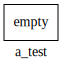

In [2]:
import automaton
a_test = automaton.Automaton("a_test")
a_test

Vous pouvez ensuite ajouter des états et des transitions. La source de la première transition sera considérée comme l'état initial:

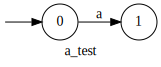

In [7]:
a_test.reset()
a_test.add_transition("0","a","1")
a_test

Notez que cet automate ne reconnait aucun mot, car il n'a aucun état d'acceptation/final. Vous pouvez marquer un ou plusieurs états comme finaux à l'aide de la fonction suivante:

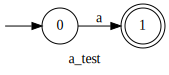

In [8]:
a_test.make_accept("1")
a_test

Alternativement, vous pouvez marquer plusieurs états comme états d'acceptation:

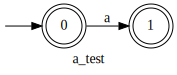

In [9]:
a_test.make_accept(["0","1"])
a_test

Vous pouvez afficher l'automate sous la forme textuelle à n'importe quel moment dans votre code, par exemple, pour déboguer. Notez que la fonction delta est donnée sous la forme d'un tableau de transitions:

In [10]:
print(a_test)

a_test = <Q={0,1}, S={a}, D, q0=0, F={0,1}>
D =
| |a|
-----
|0|1|
-----
|1| |
-----


Dans cet exemple, `Q` contient la liste d'états `{0,1}`, l'alphabet `S` est automatiquement construit à partir des transitions et contient uniquement le symbole `{a}`, l'état initial est `q0=0` et les états d'acceptation `F={0,1}`. Ces valeurs sont accessibles aussi directement, sous la forme de listes ou de chaînes de caractères, via des variables de l'automate :

In [11]:
print(a_test.states)
print(a_test.alphabet)
print(a_test.initial)
print(a_test.acceptstates)
print(a_test.transition_table)

['0', '1']
['a']
0
['0', '1']
| |a|
-----
|0|1|
-----
|1| |
-----


Vous pouvez aussi afficher votre automate sous la forme de fichier `.txt`:

In [12]:
print(a_test.to_txtfile("test.txt"))

0 a 1
A 0 1


Un automate peut être réinitialisé à tout moment:

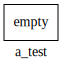

In [13]:
a_test.reset()
a_test

Vous pouvez aussi construire un automate à partir d'une chaîne de caractères directement à l'aide de la fonction `from_txt`:

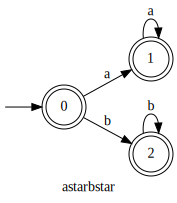

In [14]:
source = """0 a 1
0 b 2
1 a 1
2 b 2
A 0 1 2
"""
astarbstar = automaton.Automaton("astarbstar")
astarbstar.from_txt(source)
astarbstar

Essayez de modifier la variable `source` et observez le résultat dans l'automate. Ajouter ou supprimez des transitions, des états, des états d'acceptation...

Vous pouvez aussi lire un automate en passant directement le nom du fichier à la fonction `from_txtfile` (n'oubliez pas de charger le fichier si vous êtes sur Colab):

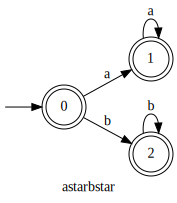

In [15]:
astarbstar.from_txtfile("test/astarbstar.af")
astarbstar


Les transitions-ε sont représentées par le symbole spécial `%` (constante `automaton.Automaton.EPSILON`). Vous pouvez créer un automate non-déterministe avec des transitions-ε comme ceci:

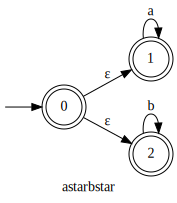

In [16]:
source = """0 % 1
0 % 2
1 a 1
2 b 2
A 0 1 2
"""
astarbstar.from_txt(source)
astarbstar

Les automates sur ce sujet s'affichent graphiquement à l'aide de la fonction `to_graphviz()`. Vous pouvez toujours copier-coller des automates ici pour les visualiser, mais il est peut-être plus pratique de les créer directement en local. Pour cela, il suffit d'appeler la fonction avec un nom de fichier, et un fichier (avec l'extension `.pdf` automatiquement ajoutée) sera créé. La fonction renvoie l'objet `graphviz` au [format DOT](https://graphviz.org/doc/info/lang.html): 

In [17]:
astarbstar_gv = astarbstar.to_graphviz("test/astarbstar.gv")
print(astarbstar_gv.source)

digraph finite_state_machine {
  rankdir=LR;  
  size="8,5"  label="astarbstar"  node [shape = doublecircle]; 0 1 2;
  node [shape = circle];
  __I__ [label="", style=invis, width=0]
  __I__ -> 0
  0 -> 1 [label = ε];
  0 -> 2 [label = ε];
  1 -> 1 [label = a];
  2 -> 2 [label = b];
}


Vous aurez peut-être besoin d'accéder à la liste d'états et de transitions de l'automate. Chaque état est dans un dictionnaire python indexé par son nom, et contient une liste de transitions. Les transitions sont, à leur tour, des dictionnaires contenant, pour chaque symbole, un ensemble d'états cible:

In [18]:
# source state 1 (from dict of states), transition on "a", first (and only) destination state
print(str(list(astarbstar.statesdict["1"].transitions["a"])[0]))

1


Vous trouverez d'autres exemples d'usage de la bibliothèque dans `automaton.py` à la toute fin du code-source.

# Travail à effectuer

Votre travail consiste à implémenter deux fonctionnalités:

1.   Écrire une fonction qui prend un automate fini en entrée et qui renvoie un booléen pour indiquer si, oui ou non, l'automate est déterministe

2.   Écrire une fonction qui prend un automate fini déterministe et un mot en entrée, et qui renvoie un booléen pour indiquer si, oui ou non, le mot est reconnu par l'automate

De plus, vous devez écrire un script/programme qui peut être exécuté sur un terminal et qui prend en entrée (`sys.argv`) deux [arguments](https://riptutorial.com/fr/python/example/6530/utilisation-d-arguments-en-ligne-de-commande-avec-argv): un fichier texte contenant un automate et un mot à reconnaître, dans cet ordre. Le script doit :

1.   Charger l'automate depuis le fichier texte (à l'aide de la bibliothèque fournie)

2.   Vérifier si l'automate est déterministe (fonctionnalité 1 ci-dessus) et, sinon, afficher _ERROR_

3.   Si l'automate est déterministe, vérifier s'il reconnaît le mot (fonctionnalité 2 ci-dessus) et afficher _YES_ si le mot est reconnu, _NO_ sinon

Quelques fichiers de test vous sont fournis dans le dossier `test`. Voici quelques exemples d'exécution pour votre programme (supposons qu'il s'appelle `tp1-automates.py` - squelette fourni):
%
```bash
$ ./tp1-automates.py test/astarbstar.af a
YES
$ ./tp1-automates.py test/astarbstar.af b
YES
$ ./tp1-automates.py test/astarbstar.af bbb
YES
$ ./tp1-automates.py test/astarbstar.af %
YES
$ ./tp1-automates.py test/astarbstar.af aaaaaaa
YES
$ ./tp1-automates.py test/astarbstar.af bbaa
NO
$ ./tp1-automates.py test/astarbstar.af aba
NO
$ ./tp1-automates.py test/astarbstar.af aabbb
NO
$ ./tp1-automates.py test/astarbstar.af abc
NO
$ ./tp1-automates.py test/astarbstar-epsilon.af abb
ERROR
$ ./tp1-automates.py test/astarbstar-nfa.af abb
ERROR
```

Vous devez non seulement implémenter la fonction mais aussi la tester. Pour cela, écrivez 3 automates finis au format textuel pour étendre la base de tests au délà des deux fichiers fournis. Vous pouvez utiliser des automates vus en cours ou en TD. Ces automates doivent être placés dans le dossier `test` et formeront votre base de tests, qui grandira au fur et à mesure des TPs. Vous pouvez générer les `.pdf` correspondants à chaque automate test à l'aide de la fonction `to_graphviz()`

Pour déboguer votre programme, n'oubliez pas que vous pouvez à tout moment appeler `print(a)` pour afficher l'automate sur le termina, ou appeler `a.to_graphviz("out.pdf")` pour le visualiser graphiquement dans un fichier `out.pdf`. En python, vous pouvez/devez aussi utiliser la bibliothèque `pdb` pour le débogage, et vous pouvez aussi typer votre programme et vérifier les types à l'aide de `mypy`.